In [87]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [88]:
# For array manipulation & For data manipulation & analysis
import numpy as np
import pandas as pd
# For creating plots & visualization
import matplotlib.pyplot as plt
# Seaborn for enhanced visualization capabilities
import seaborn as sns
# scipy.stats.ttest_ind: Independent two-sample t-test for equal sample means
from scipy.stats import ttest_ind

In [89]:
# Reads the csv file from directory
titanic_df = pd.read_csv("./titanic/train.csv", delimiter=",")

In [90]:
# Shows top first 5 data from df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# Dimensions of the df
print("Dimensions: ", titanic_df.shape)

Dimensions:  (891, 12)


In [110]:
# Column names and data types
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Title           object
IsAlone          int32
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [93]:
# Looking for any NA values and calculating their sum to analyse the na value in total
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
# Statistical Insights
print("Statistical Results")
print(titanic_df.describe())

Statistical Results
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare     IsAlone  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.602694  
std      0.806057   49.693429    0.489615  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    1.000000

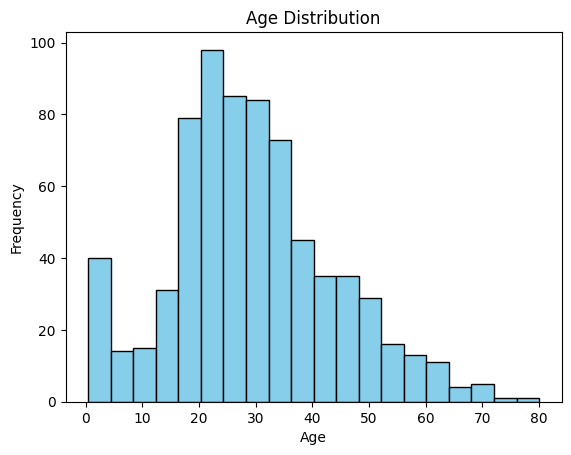

In [96]:
# Visualize Age distribution
plt.hist(titanic_df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [97]:
# Mean Imputation, Calculate the average age of passengers and replace missing age values with it
mean_age_value = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age_value, inplace=True)

In [98]:
# Mode Imputation, Finds the most frequent value and replace missing Cabin values with it
mode_cabin_value = titanic_df['Cabin'].mode()[0]
titanic_df['Cabin'].fillna(mode_cabin_value, inplace=True)

In [99]:
# Mode Imputation, Finds the most frequent value and replace missing Embarked values with it
mode_embarked_value = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked_value, inplace=True)

In [100]:
# Looking for any NA values and calculating their sum to analyse the na value in total
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [101]:
# Feature Engineering
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_df['IsAlone'] = np.where((titanic_df['SibSp'] + titanic_df['Parch']) > 0, 0, 1)

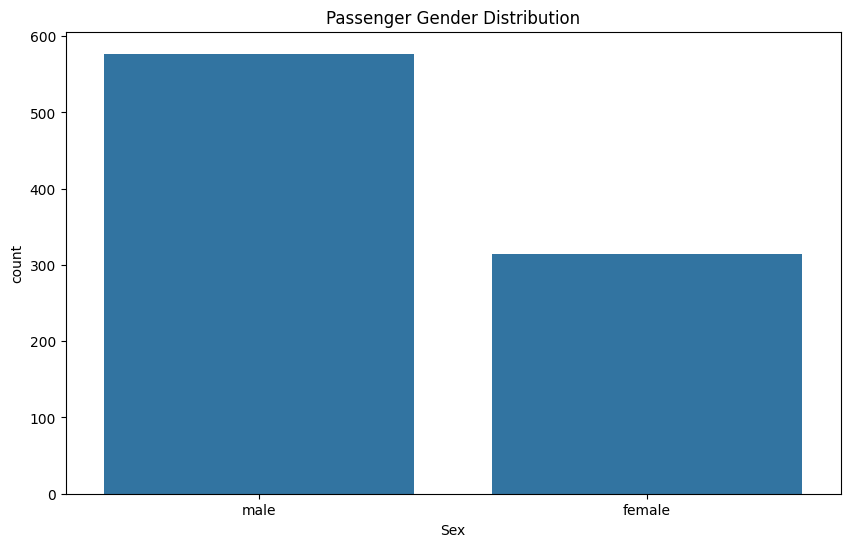

In [102]:
# Visualization of Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=titanic_df)
plt.title('Passenger Gender Distribution')
plt.show()

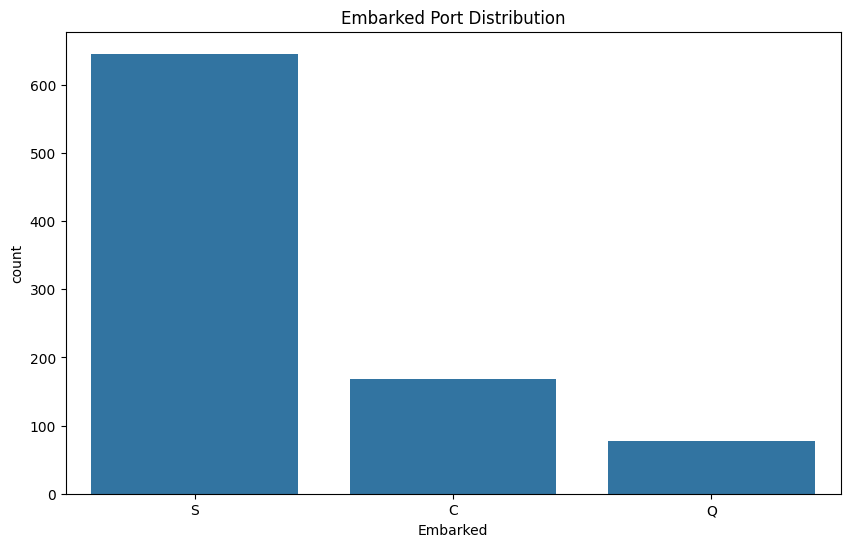

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Port Distribution')
plt.show()

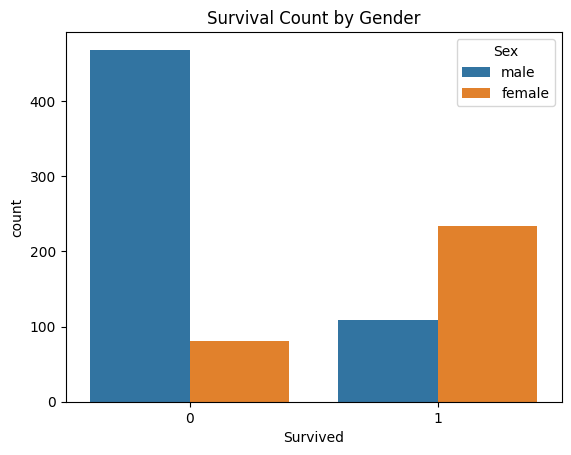

In [53]:
# Visualize the distribution of survivors by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

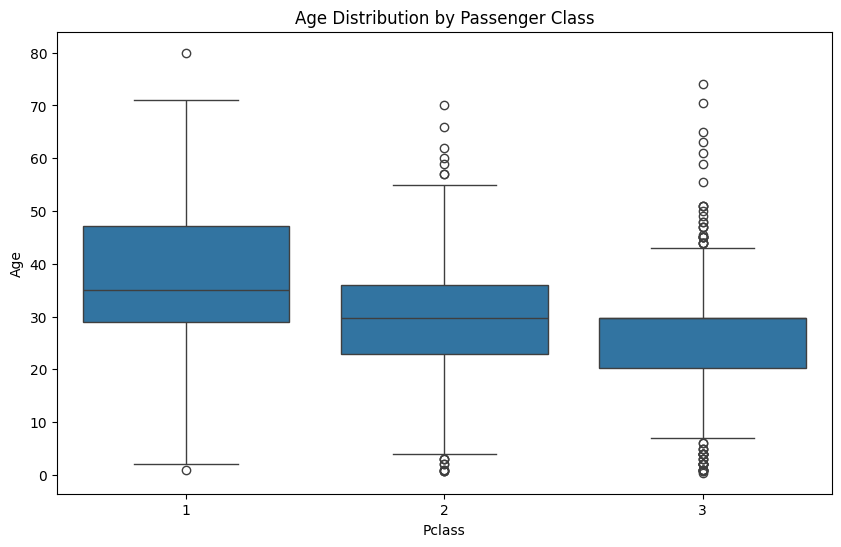

In [105]:
# Visualization of Relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

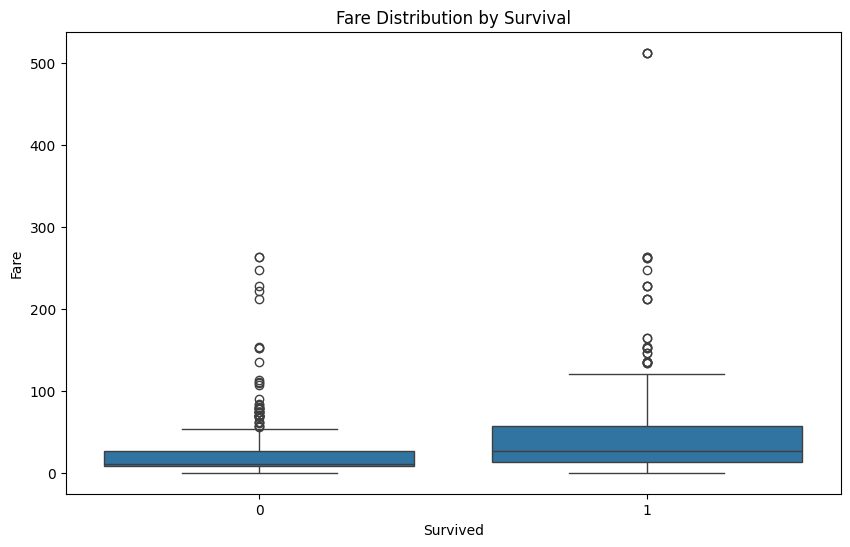

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survival')
plt.show()

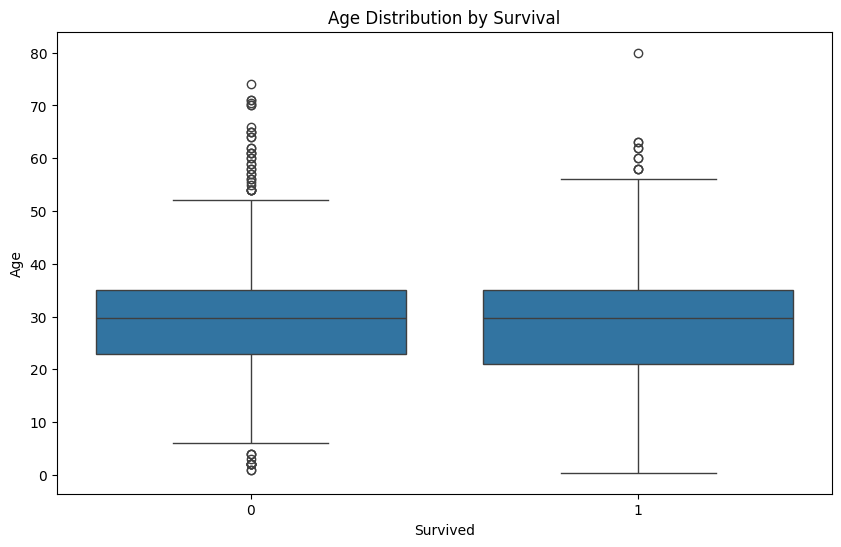

In [107]:
# Outlier Detection and Handling
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survival')
plt.show()

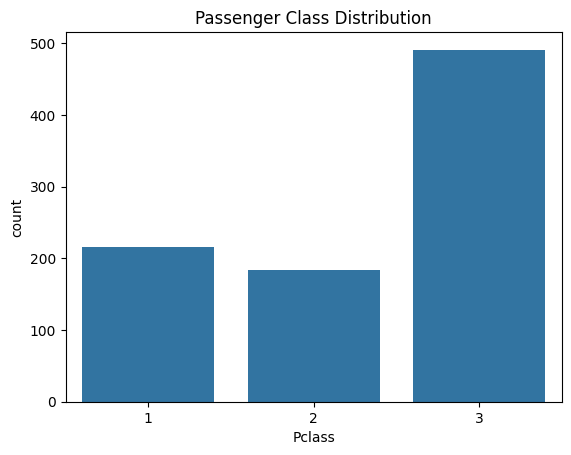

In [54]:
# Visualize the distribution of passengers by class
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Distribution')
plt.show()

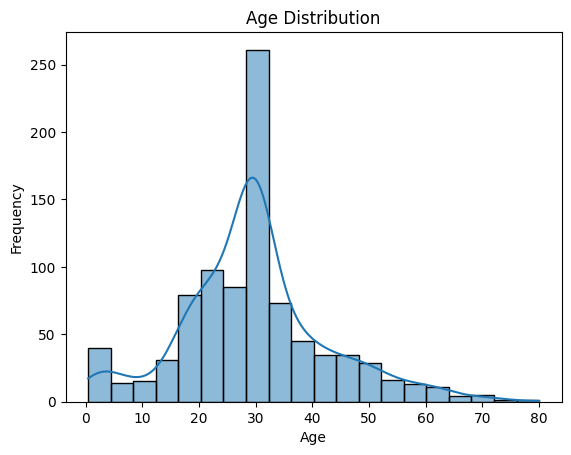

In [55]:
# Visualize the distribution of age
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [108]:
# Handling Categorical Variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

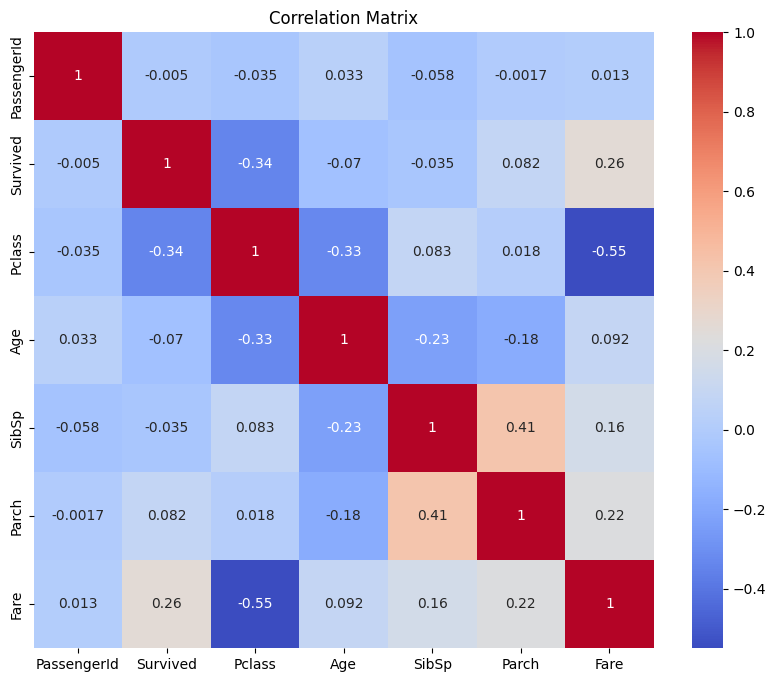

In [109]:
# Correlation matrix
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:
# Conduct a t-test to compare the ages of survivors and non-survivors
survived_ages = titanic_df[titanic_df['Survived'] == 1]['Age']
not_survived_ages = titanic_df[titanic_df['Survived'] == 0]['Age']
t_statistic, p_value = ttest_ind(survived_ages, not_survived_ages, equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.0385172031950463
P-value: 0.04189090646311582
